In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing libraries
import nltk
import numpy as np
import pandas as pd
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import math

In [3]:
# reading the Treebank tagged sentences
import nltk.corpus.reader.tagged 
nltk.download('treebank')
t = list(nltk.corpus.treebank.tagged_sents())

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [4]:
# first few tagged sentences
print(t[:40])

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], [('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')], [('A', 'DT'), ('f

Output shows that each word in the sentence is tagged with its corresponding POS tag.

In [5]:
# Splitting into train and test
random.seed(1234)
train_set, test_set = train_test_split(t,test_size=0.3)
print(len(train_set))
print(len(test_set))
print(train_set[:40])

2739
1175
[[('Still', 'RB'), (',', ','), ('many', 'JJ'), ('economists', 'NNS'), ('are', 'VBP'), ("n't", 'RB'), ('predicting', 'VBG'), ('a', 'DT'), ('recession', 'NN'), ('anytime', 'RB'), ('soon', 'RB'), ('.', '.')], [('Indeed', 'RB'), (',', ','), ('Judge', 'NNP'), ("O'Brien", 'NNP'), ('ruled', 'VBD'), ('that', 'IN'), ('``', '``'), ('it', 'PRP'), ('*EXP*-1', '-NONE-'), ('would', 'MD'), ('be', 'VB'), ('easy', 'JJ'), ('*', '-NONE-'), ('to', 'TO'), ('conclude', 'VB'), ('that', 'IN'), ('the', 'DT'), ('USIA', 'NNP'), ("'s", 'POS'), ('position', 'NN'), ('is', 'VBZ'), ('`', '``'), ('inappropriate', 'JJ'), ('or', 'CC'), ('even', 'RB'), ('stupid', 'JJ'), (',', ','), ("'", "''"), ("''", "''"), ('but', 'CC'), ('it', 'PRP'), ("'s", 'VBZ'), ('the', 'DT'), ('law', 'NN'), ('.', '.')], [('The', 'DT'), ('new', 'JJ'), ('company', 'NN'), ('said', 'VBD'), ('0', '-NONE-'), ('it', 'PRP'), ('believes', 'VBZ'), ('0', '-NONE-'), ('there', 'EX'), ('are', 'VBP'), ('fewer', 'JJR'), ('than', 'IN'), ('100', 'CD'), (

In [6]:
# Getting list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

70382

In [7]:
# tokens 
tokens = [pair[0] for pair in train_tagged_words]
# vocabulary
V = set(tokens)
print("Total vocabularies: ",len(V))
# number of tags
T = set([pair[1] for pair in train_tagged_words])
print("Total tags: ",len(T))

Total vocabularies:  10247
Total tags:  46


In [8]:
#Emission Probabilities
# computing P(w/t) and storing in T x V matrix
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

In [9]:
# examples
# large
print("\n", "large")
print(word_given_tag('large', 'JJ'))
print(word_given_tag('large', 'VB'))
print(word_given_tag('large', 'NN'), "\n")
# will
print("\n", "will")
print(word_given_tag('will', 'MD'))
print(word_given_tag('will', 'NN'))
print(word_given_tag('will', 'VB'))
# book
print("\n", "book")
print(word_given_tag('book', 'NN'))
print(word_given_tag('book', 'VB'))


 large
(15, 4026)
(0, 1808)
(0, 9228) 


 will
(187, 651)
(1, 9228)
(0, 1808)

 book
(6, 9228)
(0, 1808)


In [10]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [11]:
# examples
print(t2_given_t1(t2='NNP', t1='JJ'))
print(t2_given_t1('NN', 'JJ'))
print(t2_given_t1('NN', 'DT'))
print(t2_given_t1('NNP', 'VB'))
print(t2_given_t1(',', 'NNP'))
print(t2_given_t1('PRP', 'PRP'))
print(t2_given_t1('VBG', 'NNP'))

(133, 4026)
(1809, 4026)
(2689, 5672)
(62, 1808)
(961, 6607)
(2, 1197)
(5, 6607)


In [12]:
#Please note P(tag|start) is same as P(tag|'.')
print(t2_given_t1('DT', '.'))
print(t2_given_t1('VBG', '.'))
print(t2_given_t1('NN', '.'))
print(t2_given_t1('NNP', '.'))

(573, 2708)
(7, 2708)
(114, 2708)
(508, 2708)


In [13]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)
tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]
tags_matrix

array([[0.00067935, 0.00407609, 0.04959239, ..., 0.        , 0.        ,
        0.00747283],
       [0.0175    , 0.000625  , 0.0225    , ..., 0.000625  , 0.003125  ,
        0.00625   ],
       [0.        , 0.01272016, 0.00195695, ..., 0.        , 0.        ,
        0.03816047],
       ...,
       [0.00341297, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01754386, 0.07017544, 0.        , ..., 0.        , 0.01169591,
        0.00584795],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [14]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))
tags_df

,VBZ,CC,VBG,#,:,",",-NONE-,DT,EX,PRP$,...,POS,RB,CD,JJR,UH,PDT,$,WDT,NNPS,TO
VBZ,0.000679,0.004076,0.049592,0.000000,0.004076,0.007473,0.199049,0.130435,0.000000,0.005435,...,0.000000,0.129755,0.017663,0.006793,0.000000,0.000000,0.006114,0.000000,0.000000,0.007473
CC,0.017500,0.000625,0.022500,0.000000,0.000625,0.009375,0.009375,0.110000,0.005000,0.015625,...,0.000000,0.053125,0.043125,0.011250,0.000000,0.000000,0.021250,0.000625,0.003125,0.006250
VBG,0.000000,0.012720,0.001957,0.000000,0.002935,0.017613,0.072407,0.178082,0.000000,0.028376,...,0.000000,0.033268,0.020548,0.016634,0.000000,0.000978,0.002935,0.000000,0.000000,0.038160
#,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
:,0.009804,0.058824,0.007353,0.000000,0.000000,0.000000,0.026961,0.120098,0.002451,0.002451,...,0.000000,0.039216,0.120098,0.004902,0.000000,0.000000,0.009804,0.002451,0.000000,0.002451
",",0.030436,0.087504,0.016389,0.000000,0.000000,0.000000,0.035996,0.132572,0.004097,0.002927,...,0.000000,0.056775,0.023998,0.001171,0.000000,0.000000,0.009365,0.033655,0.000000,0.003805
-NONE-,0.037013,0.009468,0.085001,0.000000,0.006886,0.054229,0.077039,0.053153,0.001076,0.005165,...,0.000215,0.022165,0.003443,0.001937,0.000000,0.000000,0.001722,0.000000,0.000000,0.186572
DT,0.004760,0.000529,0.010578,0.000000,0.000353,0.001410,0.002116,0.001058,0.000000,0.000176,...,0.000000,0.008815,0.022920,0.006171,0.000000,0.000000,0.008463,0.000176,0.003702,0.000000
EX,0.583333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PRP$,0.001876,0.000000,0.005629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001876,0.020638,0.003752,0.000000,0.000000,0.015009,0.000000,0.001876,0.000000


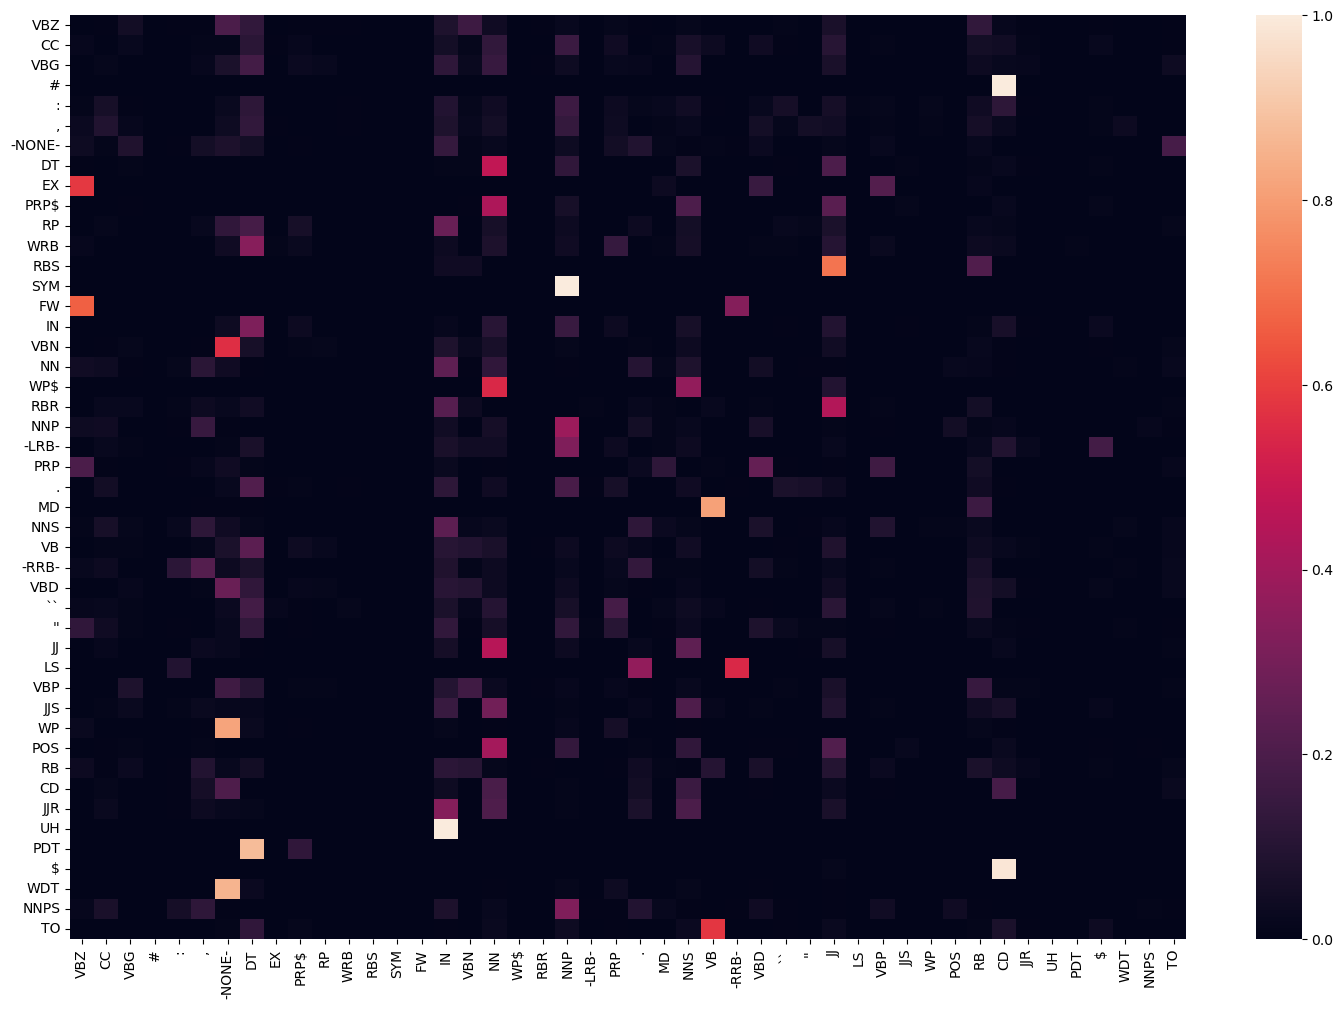

In [15]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

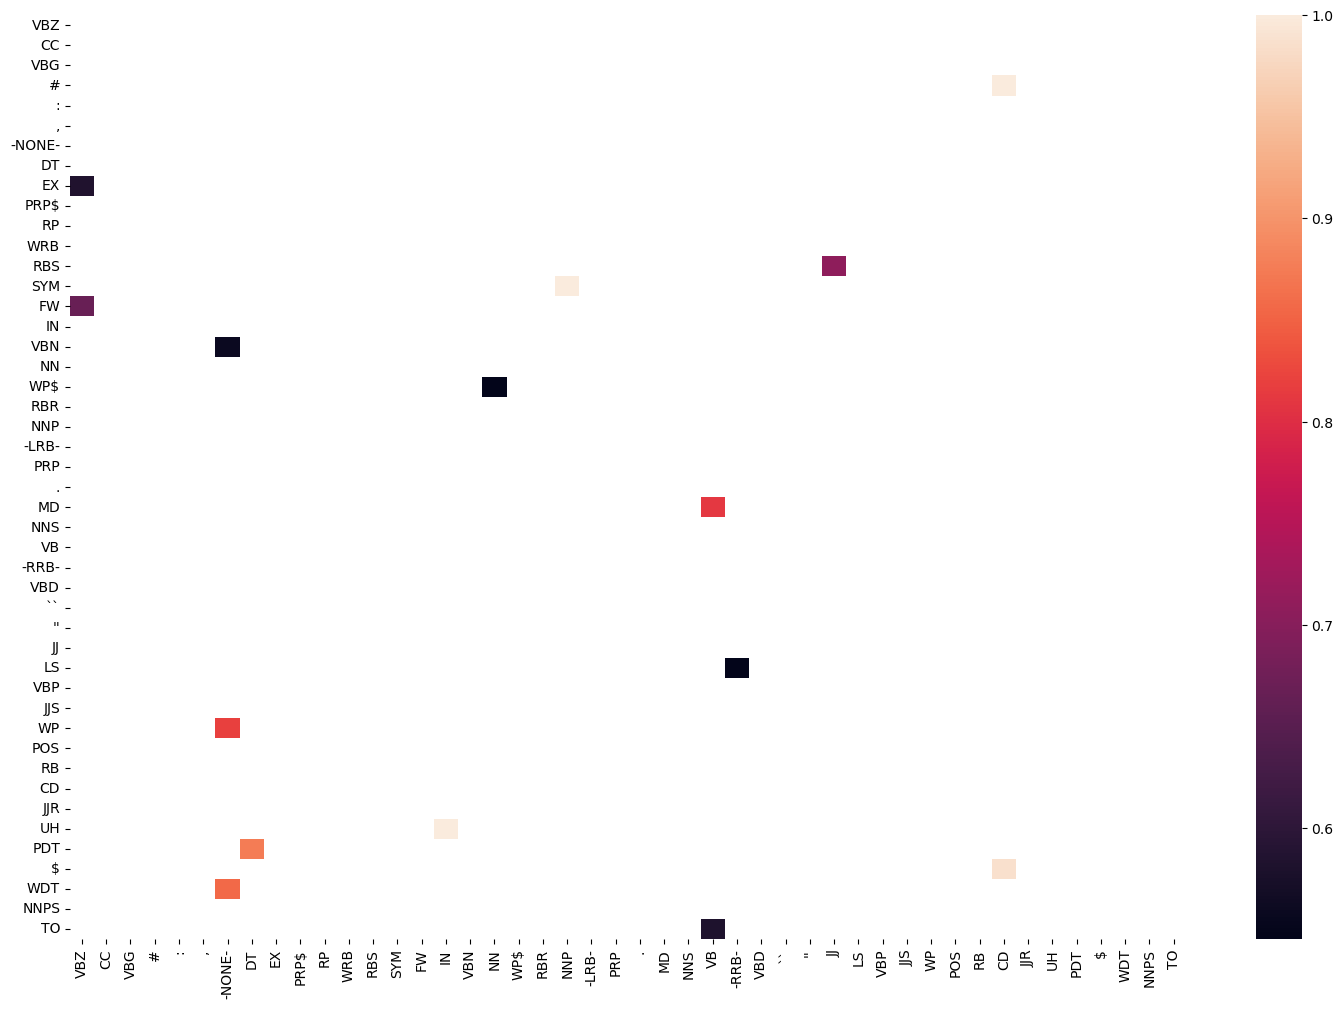

['VBZ',
 'CC',
 'VBG',
 '#',
 ':',
 ',',
 '-NONE-',
 'DT',
 'EX',
 'PRP$',
 'RP',
 'WRB',
 'RBS',
 'SYM',
 'FW',
 'IN',
 'VBN',
 'NN',
 'WP$',
 'RBR',
 'NNP',
 '-LRB-',
 'PRP',
 '.',
 'MD',
 'NNS',
 'VB',
 '-RRB-',
 'VBD',
 '``',
 "''",
 'JJ',
 'LS',
 'VBP',
 'JJS',
 'WP',
 'POS',
 'RB',
 'CD',
 'JJR',
 'UH',
 'PDT',
 '$',
 'WDT',
 'NNPS',
 'TO']

In [16]:
#finding frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()
list(tags_frequent)


In [17]:
# Viterbi Algorithm
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [18]:
# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset
random.seed(1234)
# choose random 30 sents
rndom = [random.randint(1,len(test_set)) for x in range(30)]
# list of sents
test_run = [test_set[i] for i in rndom]
# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]
# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('Mr.', 'NNP'),
  ('Nixon', 'NNP'),
  ('also', 'RB'),
  ('proposed', 'VBD'),
  ('that', 'IN'),
  ('China', 'NNP'),
  ('restore', 'VB'),
  ('its', 'PRP$'),
  ('participation', 'NN'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('Fulbright', 'NNP'),
  ('Program', 'NNP'),
  (',', ','),
  ('a', 'DT'),
  ('U.S.', 'NNP'),
  ('government-funded', 'JJ'),
  ('academic', 'JJ'),
  ('exchange', 'NN'),
  ('.', '.')],
 [('``', '``'),
  ('There', 'EX'),
  ('may', 'MD'),
  ('be', 'VB'),
  ('an', 'DT'),
  ('international', 'JJ'),
  ('viewpoint', 'NN'),
  ('cast', 'VBN'),
  ('*-2', '-NONE-'),
  ('on', 'IN'),
  ('the', 'DT'),
  ('funds', 'NNS'),
  ('listed', 'VBN'),
  ('*', '-NONE-'),
  ('here', 'RB'),
  (',', ','),
  ("''", "''"),
  ('Mr.', 'NNP'),
  ('Porter', 'NNP'),
  ('says', 'VBZ'),
  ('*T*-1', '-NONE-'),
  ('.', '.')],
 [('In', 'IN'),
  ('the', 'DT'),
  ('1970s', 'CD'),
  (',', ','),
  ('scientists', 'NNS'),
  ('reported', 'VBD'),
  ('cancer', 'NN'),
  ('cases', 'NNS'),
  ('among', 'IN'),
  ('the', 'DT')

In [19]:
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start
print("Time taken in seconds: ", difference)
print(tagged_seq)

Time taken in seconds:  1108.6891927719116
[('Mr.', 'NNP'), ('Nixon', 'NNP'), ('also', 'RB'), ('proposed', 'VBN'), ('that', 'IN'), ('China', 'NNP'), ('restore', 'VB'), ('its', 'PRP$'), ('participation', 'VBZ'), ('in', 'IN'), ('the', 'DT'), ('Fulbright', 'VBZ'), ('Program', 'NN'), (',', ','), ('a', 'DT'), ('U.S.', 'NNP'), ('government-funded', 'VBZ'), ('academic', 'JJ'), ('exchange', 'NN'), ('.', '.'), ('``', '``'), ('There', 'EX'), ('may', 'MD'), ('be', 'VB'), ('an', 'DT'), ('international', 'JJ'), ('viewpoint', 'NN'), ('cast', 'VBN'), ('*-2', '-NONE-'), ('on', 'IN'), ('the', 'DT'), ('funds', 'NNS'), ('listed', 'VBN'), ('*', '-NONE-'), ('here', 'RB'), (',', ','), ("''", "''"), ('Mr.', 'NNP'), ('Porter', 'NNP'), ('says', 'VBZ'), ('*T*-1', '-NONE-'), ('.', '.'), ('In', 'IN'), ('the', 'DT'), ('1970s', 'CD'), (',', ','), ('scientists', 'NNS'), ('reported', 'VBD'), ('cancer', 'NN'), ('cases', 'NNS'), ('among', 'IN'), ('the', 'DT'), ('daughters', 'NNS'), ('of', 'IN'), ('DES', 'NNP'), ('users

In [20]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq)
print(accuracy)

0.9030054644808743


In [21]:
## Testing
nltk.download('punkt')
sentence_test = 'Twitter is the best networking social site. Man is a social animal. Data science is an emerging field. Data science jobs are high in demand.'
words = word_tokenize(sentence_test)
start = time.time()
tagged_seq1 = Viterbi(words)
print(tagged_seq1)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('Twitter', 'VBZ'), ('is', 'VBZ'), ('the', 'DT'), ('best', 'JJS'), ('networking', 'NN'), ('social', 'JJ'), ('site', 'VBZ'), ('.', '.'), ('Man', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('social', 'JJ'), ('animal', 'VBZ'), ('.', '.'), ('Data', 'VBZ'), ('science', 'NN'), ('is', 'VBZ'), ('an', 'DT'), ('emerging', 'VBG'), ('field', 'NN'), ('.', '.'), ('Data', 'VBZ'), ('science', 'NN'), ('jobs', 'NNS'), ('are', 'VBP'), ('high', 'JJ'), ('in', 'IN'), ('demand', 'NN'), ('.', '.')]
